## Regression for Diabetes Dataset

Prediction of a quantitative measure of the disease progression one year after baseline.

### 

> for TeX typesetting plese use [Markdown All in One](https://marketplace.visualstudio.com/items?itemName=yzhang.markdown-all-in-one) extension. 

In [155]:
import numpy as np 
import pandas as pd

# plotting
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

# keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical 

# utils
from sklearn.datasets import load_diabetes
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import confusion_matrix, roc_curve

sns.set_theme(style="white")
sns.set(font_scale=1.5, rc={'text.usetex' : True})

In [159]:
def make_nn_regressor(input_dim):
    """ 
    Neural network based regressor,
    Args:
        input_dim: (int) the size of the input vectors
    """
    model = Sequential()
    layers = [
        Dense(16, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='linear'),
    ]
    opt = Adam(learning_rate=0.0005)

    for l in layers:
        model.add(l)
    
    # compile the keras model
    model.compile(
        loss='mse', 
        optimizer=opt, 
        metrics=['mse', 'cosine_similarity'])

    return model

### Data Survey

In [4]:
# load data set for regression 
dataset = load_diabetes(as_frame=True)
# predictors 
data = dataset['data']
# target
target = dataset['target']
data['target'] = target

In [5]:
data.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [6]:
target.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [7]:
fig = px.scatter_3d(
                    data, 
                    x='age', 
                    y='bmi', 
                    z='s2', 
                    color='target'
                    )
fig.show()

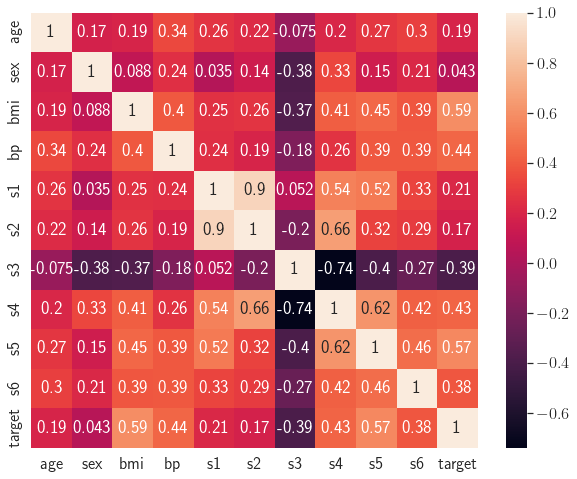

In [10]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()

### Training and Test data set assembly

In [117]:
# predictor target as numpy array 
X, Y = data.values[:, :10], target.values
n, p = X.shape
# scale target 
scaler_y = StandardScaler()
scaler_y.fit(Y.reshape(-1, 1))
Ysc = scaler_y.transform(Y.reshape(-1, 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Ysc, test_size=0.33, random_state=25)

print(f'Train size: {X_train.shape[0]}')
print(f'Test size: {X_test.shape[0]}')
print(f'Target Min: {np.min(Ysc):.2f}, Max: {np.max(Ysc):.2f}, Std: {np.std(Ysc):.2f}, Mean: {np.mean(Ysc):.2f}')

Train size: 296
Test size: 146
Target Min: -1.65, Max: 2.52, Std: 1.00, Mean: -0.00


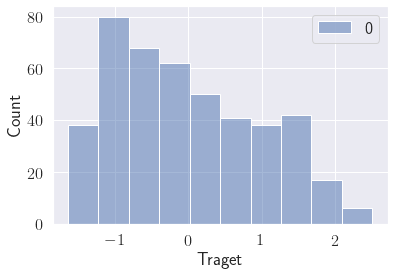

In [92]:
sns.histplot(Ysc)
plt.xlabel('Traget')
plt.show()

### Model Training and Test of the model  

In [160]:
model = make_nn_regressor(p)

history = model.fit(X_train, Y_train,
                    epochs=300,
                    batch_size=300,
                    validation_split=0.2,
                    verbose=0
                   )

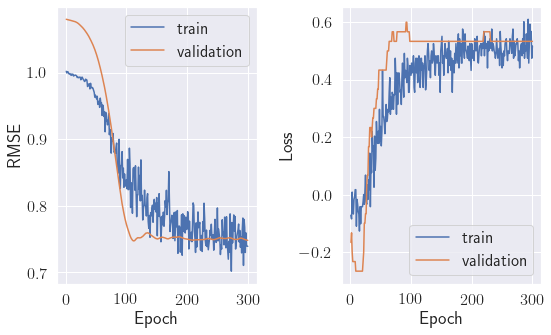

In [161]:
x = np.arange(1, len(history.history['loss']) + 1, 1)

fig, ax = plt.subplots(figsize=(8, 5)) 

plt.subplot(1,2,1)
sns.lineplot(x=x, y=np.sqrt(history.history['loss']), label='train')
sns.lineplot(x=x, y=np.sqrt(history.history['val_loss']), label='validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
sns.lineplot(x=x, y=history.history['cosine_similarity'], label='train')
sns.lineplot(x=x, y=history.history['val_cosine_similarity'], label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()

plt.show()

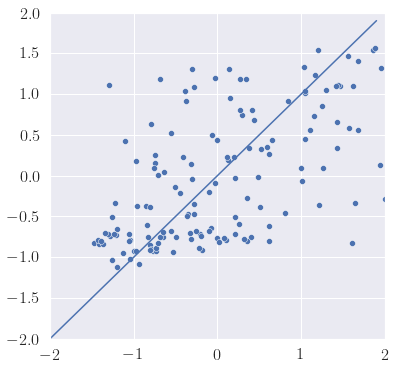

In [148]:
Y_pred_test = model.predict(X_test)

fig, ax = plt.subplots(figsize=(6,6)) 
sns.lineplot(x=np.arange(-2, 2, 0.1), y=np.arange(-2, 2, 0.1))
sns.scatterplot(x=Y_test.flatten(), y=Y_pred_test.flatten())
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [95]:
print(np.column_stack((Y_test, Y_pred_test)))

[[ 1.67346624e+00  1.79271781e+00]
 [ 1.05013613e+00  9.37006354e-01]
 [ 1.28127008e-01 -2.47665733e-01]
 [-7.93882112e-01  7.04713106e-01]
 [ 8.03401293e-01 -5.25833189e-01]
 [-6.38049585e-01 -3.00952017e-01]
 [ 1.67346624e+00  1.06916523e+00]
 [-1.26137969e+00 -8.54241073e-01]
 [-7.67910024e-01 -8.61554027e-01]
 [ 4.00833931e-01 -6.30734861e-01]
 [ 1.02154920e-01 -6.31863952e-01]
 [-1.04061695e+00 -9.29055214e-01]
 [ 9.98191953e-01  3.14250171e-01]
 [ 1.20596866e+00  1.45196426e+00]
 [ 1.15140964e-01  5.81872582e-01]
 [-2.74440354e-01  1.12252474e+00]
 [ 6.21596678e-01 -8.45193803e-01]
 [-8.06868156e-01 -5.83650708e-01]
 [ 1.99811734e+00  9.14404392e-01]
 [ 1.85527085e+00  1.16564512e+00]
 [ 2.06043272e-01 -5.27974069e-01]
 [ 1.42673140e+00  3.24104667e-01]
 [-9.75686727e-01  7.16552019e-01]
 [ 1.62152206e+00  8.16872597e-01]
 [-7.96496949e-02 -5.83493471e-01]
 [-6.66636509e-02  2.93897629e-01]
 [-1.05621783e-01  2.08431095e-01]
 [-5.34161233e-01 -6.86675549e-01]
 [ 2.57987448e-01 -5